In [ ]:
import tensorflow as tf

print(tf.__version__)

2.8.2


In [1]:
!wget --no-check-certificate \
  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2022-06-11 13:26:07--  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip
Resolving dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)... 205.185.216.42, 205.185.216.10
Connecting to dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)|205.185.216.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M   209MB/s    in 0.3s    

2022-06-11 13:26:07 (209 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [2]:
import zipfile, os

local_zip = '/tmp/messy_vs_clean_room.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
os.listdir('/tmp/images/train')
os.listdir('/tmp/images/val')

['messy', 'clean']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=4,
    class_mode='binary'
)

train_generator

Found 192 images belonging to 2 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=4,
    class_mode='binary'
)

validation_generator

Found 20 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy']
)

In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2
)

Epoch 1/20
25/25 - 5s - loss: 0.7549 - accuracy: 0.5000 - val_loss: 0.6911 - val_accuracy: 0.5000 - 5s/epoch - 202ms/step
Epoch 2/20
25/25 - 5s - loss: 0.6915 - accuracy: 0.5100 - val_loss: 0.6831 - val_accuracy: 0.5000 - 5s/epoch - 201ms/step
Epoch 3/20
25/25 - 5s - loss: 0.6877 - accuracy: 0.4900 - val_loss: 0.6594 - val_accuracy: 0.5500 - 5s/epoch - 187ms/step
Epoch 4/20
25/25 - 5s - loss: 0.6894 - accuracy: 0.5600 - val_loss: 0.6925 - val_accuracy: 0.5500 - 5s/epoch - 190ms/step
Epoch 5/20
25/25 - 5s - loss: 0.6825 - accuracy: 0.6600 - val_loss: 0.7216 - val_accuracy: 0.5000 - 5s/epoch - 191ms/step
Epoch 6/20
25/25 - 4s - loss: 0.6787 - accuracy: 0.5600 - val_loss: 0.6867 - val_accuracy: 0.6000 - 4s/epoch - 171ms/step
Epoch 7/20
25/25 - 5s - loss: 0.6941 - accuracy: 0.4800 - val_loss: 0.6932 - val_accuracy: 0.5000 - 5s/epoch - 180ms/step
Epoch 8/20
25/25 - 4s - loss: 0.6945 - accuracy: 0.4600 - val_loss: 0.6926 - val_accuracy: 0.5000 - 4s/epoch - 171ms/step
Epoch 9/20
25/25 - 4s - 

Saving maxresdefault.jpg to maxresdefault.jpg
maxresdefault.jpg
clean


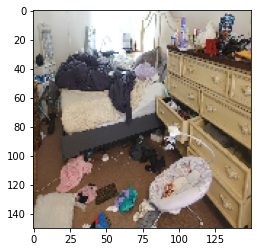

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes==0:
    print('messy')
  else:
    print('clean')